Fractal dimension analysis after segmentation

In [5]:
import nibabel as nib
from nibabel.freesurfer.io import read_geometry 
import matplotlib.pyplot as plt
import numpy as np
import utils as ut
import porespy as ps

The segmentation process assigns a value to each voexl. Using the LookUpTable from freesurfer, we can identify in pythin which parts are detected/segmented

In [6]:
# Freesurfer label mapping
index_to_label = {}
with open('FreeSurferColorLUT.txt', 'r') as file:
    for line in file:
        # comments or empty
        if line.startswith('#') or not line.strip():
            continue

        parts = line.split()
        index = int(parts[0])
        label_name = ' '.join(parts[1:-4])
        index_to_label[index] = label_name

The resulting dictionnary maps the number to the anatomical region

In [7]:
index_to_label

{0: 'Unknown',
 1: 'Left-Cerebral-Exterior',
 2: 'Left-Cerebral-White-Matter',
 3: 'Left-Cerebral-Cortex',
 4: 'Left-Lateral-Ventricle',
 5: 'Left-Inf-Lat-Vent',
 6: 'Left-Cerebellum-Exterior',
 7: 'Left-Cerebellum-White-Matter',
 8: 'Left-Cerebellum-Cortex',
 9: 'Left-Thalamus-unused',
 10: 'Left-Thalamus',
 11: 'Left-Caudate',
 12: 'Left-Putamen',
 13: 'Left-Pallidum',
 14: '3rd-Ventricle',
 15: '4th-Ventricle',
 16: 'Brain-Stem',
 17: 'Left-Hippocampus',
 18: 'Left-Amygdala',
 19: 'Left-Insula',
 20: 'Left-Operculum',
 21: 'Line-1',
 22: 'Line-2',
 23: 'Line-3',
 24: 'CSF',
 25: 'Left-Lesion',
 26: 'Left-Accumbens-area',
 27: 'Left-Substancia-Nigra',
 28: 'Left-VentralDC',
 29: 'Left-undetermined',
 30: 'Left-vessel',
 31: 'Left-choroid-plexus',
 32: 'Left-F3orb',
 33: 'Left-aOg',
 34: 'Left-WMCrowns',
 35: 'Left-mOg',
 36: 'Left-pOg',
 37: 'Left-Stellate',
 38: 'Left-Porg',
 39: 'Left-Aorg',
 40: 'Right-Cerebral-Exterior',
 41: 'Right-Cerebral-White-Matter',
 42: 'Right-Cerebral-Co

We now load the segmented volume and check which regions are segmented

In [8]:
img = nib.load('sample/segmented_0.nii.gz')
array = img.get_fdata()
array.shape # note that the segmentation is smaller in volume

(101, 137, 109)

In [9]:
present_labels = np.unique(array)
# len(present_labels)
print("Detected labels :")
for i, lbl in enumerate(present_labels):
    print(f"{index_to_label.get(lbl, 'Unknown')}")
print(f"detected {i+1}")

Detected labels :
Unknown
Left-Cerebral-White-Matter
Left-Cerebral-Cortex
Left-Lateral-Ventricle
Left-Inf-Lat-Vent
Left-Cerebellum-White-Matter
Left-Cerebellum-Cortex
Left-Thalamus
Left-Caudate
Left-Putamen
Left-Pallidum
3rd-Ventricle
4th-Ventricle
Brain-Stem
Left-Hippocampus
Left-Amygdala
CSF
Left-Accumbens-area
Left-VentralDC
Right-Cerebral-White-Matter
Right-Cerebral-Cortex
Right-Lateral-Ventricle
Right-Inf-Lat-Vent
Right-Cerebellum-White-Matter
Right-Cerebellum-Cortex
Right-Thalamus
Right-Caudate
Right-Putamen
Right-Pallidum
Right-Hippocampus
Right-Amygdala
Right-Accumbens-area
Right-VentralDC
detected 33


In [21]:
present_labels

array([ 0.,  2.,  3.,  4.,  5.,  7.,  8., 10., 11., 12., 13., 14., 15.,
       16., 17., 18., 24., 26., 28., 41., 42., 43., 44., 46., 47., 49.,
       50., 51., 52., 53., 54., 58., 60.])

In [ ]:
# FD on the whole brain is much faster after segmentation, but the output is currently different : 
ut.fractal_analysis('sample/segmented_0.nii.gz')

# FD on the whole brain : 
ut.fractal_analysis('sample/brain_0.nii.gz')

Now, we can select regions of interest for FD 

In [7]:
# For example, left hemi wm is 2, and right is 41 :
wm_left = (array == 2)
wm_right = (array == 41)
# we recreate a nifti volume with only the wm 
leftwm_nii = nib.Nifti1Image(wm_left.astype(np.uint8), img.affine, img.header)
rightwm_nii = nib.Nifti1Image(wm_right.astype(np.uint8), img.affine, img.header)
nib.save(leftwm_nii, f"sample/2_{index_to_label[2]}.nii.gz")
nib.save(rightwm_nii, f"sample/41_{index_to_label[41]}.nii.gz")

# FD on the left wm  : 
ut.fractal_analysis(f"sample/2_{index_to_label[2]}.nii.gz", verbose=False)
# FD on the right wm  : 
ut.fractal_analysis(f"sample/41_{index_to_label[41]}.nii.gz", verbose=False)

The voxel size is 1.0 x 1.0 x 1.0 mm^3
Shape of the image : (101, 137, 109)
FD automatically selected: 2.4381
The voxel size is 1.0 x 1.0 x 1.0 mm^3
Shape of the image : (101, 137, 109)
FD automatically selected: 2.4351


2.4351

Second FD method :  [porespy](https://github.com/PMEAL/porespy)

In [14]:
wm_left = (array == 2)
wm_right = (array == 41)

data = ps.metrics.boxcount(array)
data_wmleft = ps.metrics.boxcount(wm_left)
data_wmright = ps.metrics.boxcount(wm_right)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

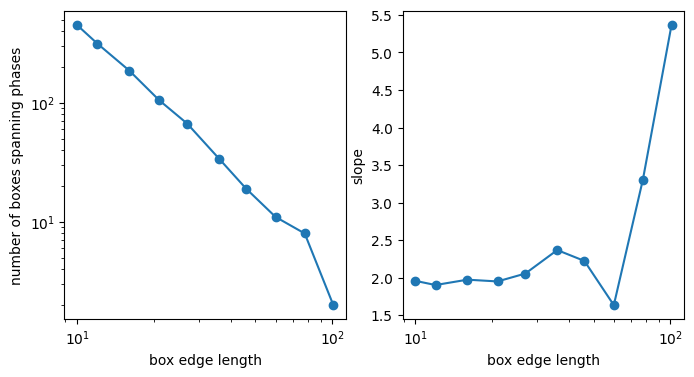

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel('box edge length')
ax1.set_ylabel('number of boxes spanning phases')
ax2.set_xlabel('box edge length')
ax2.set_ylabel('slope')
ax2.set_xscale('log')
ax1.plot(data.size, data.count,'-o')
ax2.plot(data.size, data.slope,'-o');

Left

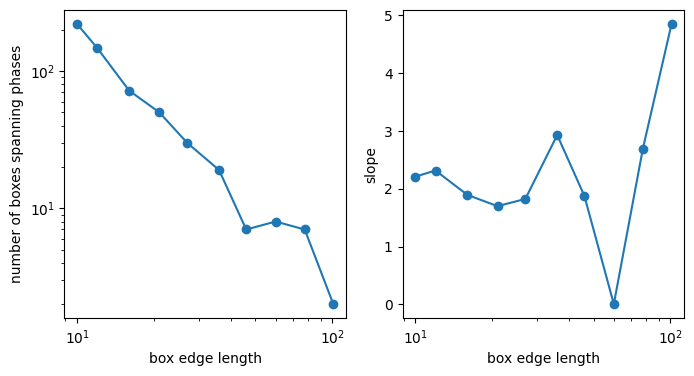

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel('box edge length')
ax1.set_ylabel('number of boxes spanning phases')
ax2.set_xlabel('box edge length')
ax2.set_ylabel('slope')
ax2.set_xscale('log')
ax1.plot(data_wmleft.size, data_wmleft.count,'-o')
ax2.plot(data_wmleft.size, data_wmleft.slope,'-o');

Right

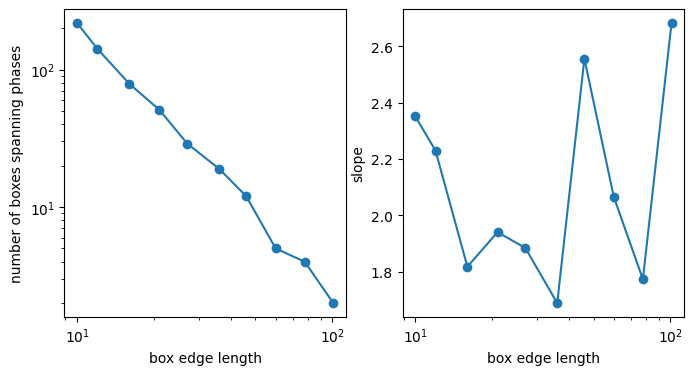

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel('box edge length')
ax1.set_ylabel('number of boxes spanning phases')
ax2.set_xlabel('box edge length')
ax2.set_ylabel('slope')
ax2.set_xscale('log')
ax1.plot(data_wmright.size, data_wmright.count,'-o')
ax2.plot(data_wmright.size, data_wmright.slope,'-o');